# PyTorch

In [1]:
import torch
import urllib.request
import warnings
warnings.filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Bild aus Internet-Repository importieren

In [2]:

#url = 'https://pytorch.tips/coffee'
#fpath = 'coffee.jpg'
#urllib.request.urlretrieve(url,fpath)

### Bild laden und anzeigen

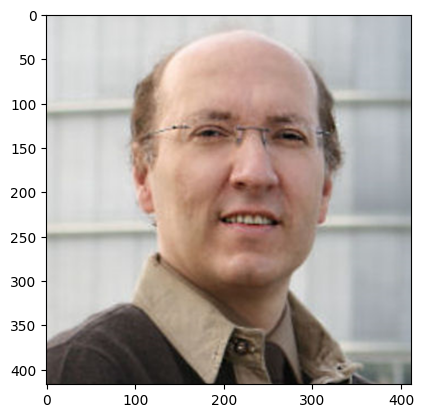

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('daten/Heiko.png')
#img = Image.open('daten/Airplane.jpg')

plt.imshow(img)
plt.show()

### Bild transformieren

In [3]:
from torchvision import transforms

transform= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
     mean = [0.485,0.465,0.406],
        std = [0.229,0.224,0.225]
    )
])

img_tensor = transform(img)
print(type(img_tensor),img_tensor.shape)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

### Batch erstellen

In [5]:
batch = img_tensor.unsqueeze(0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


### AlexNet Modell laden

In [6]:
from torchvision import models

model = models.alexnet(pretrained = True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

torch.Size([1, 1000])


In [7]:
y_max , index = torch.max(y,1)
print(index,y_max)

tensor([404]) tensor([22.4232], grad_fn=<MaxBackward0>)


In [8]:
url = 'https://pytorch.tips/imagenet-labels'

fpath = 'imagenet_class_labels.text'
urllib.request.urlretrieve(url,fpath)

with open(fpath) as f:
    classes = [line.strip() for line in f.readlines()]
    
print(classes[index.item()])

404: 'airliner',
